In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
dd = pd.read_csv("test.csv")
csv_file = dd.head(1000)
keys_csv_file = list(csv_file.keys())
for i in keys_csv_file:
    if csv_file[i].isnull().any():
        print(f"Столбец \"{i}\" имеет нулевые значения")
    else:
        print(f"Столбец \"{i}\" не имеет нулевые значения")
csv_file = csv_file.fillna("0.00")
print("\nВсе нулевые значения были заполнены \"0.00\"")

Столбец "Id" не имеет нулевые значения
Столбец "DistrictId" не имеет нулевые значения
Столбец "Rooms" не имеет нулевые значения
Столбец "Square" не имеет нулевые значения
Столбец "LifeSquare" имеет нулевые значения
Столбец "KitchenSquare" не имеет нулевые значения
Столбец "Floor" не имеет нулевые значения
Столбец "HouseFloor" не имеет нулевые значения
Столбец "HouseYear" не имеет нулевые значения
Столбец "Ecology_1" не имеет нулевые значения
Столбец "Ecology_2" не имеет нулевые значения
Столбец "Ecology_3" не имеет нулевые значения
Столбец "Social_1" не имеет нулевые значения
Столбец "Social_2" не имеет нулевые значения
Столбец "Social_3" не имеет нулевые значения
Столбец "Healthcare_1" имеет нулевые значения
Столбец "Helthcare_2" не имеет нулевые значения
Столбец "Shops_1" не имеет нулевые значения
Столбец "Shops_2" не имеет нулевые значения

Все нулевые значения были заполнены "0.00"


In [5]:
print("Подсчет общего количества квартир с сортировкой по комнатам:\n", csv_file["Rooms"].value_counts().sort_index())

Подсчет общего количества квартир с сортировкой по комнатам:
 Rooms
0.0      1
1.0    350
2.0    391
3.0    237
4.0     18
5.0      2
6.0      1
Name: count, dtype: int64


In [6]:
def convert(Data_dd, columss):
    try:
        Data_dd[columss] = csv_file[columss].astype(float)
        return True
    except(ValueError, TypeError):
        return False

for column in csv_file.columns:
    if csv_file[column].dtype == "int64" or csv_file[column].dtype == "float64":
        Q1 = csv_file[column].quantile(0.25)
        Q3 = csv_file[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        csv_file = csv_file[(csv_file[column] >= lower_bound) & (csv_file[column] <= upper_bound)]
    elif convert(csv_file, column):
        csv_file[column] = csv_file[column].astype(float)
        Q1 = csv_file[column].quantile(0.25)
        Q3 = csv_file[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        csv_file = csv_file[(csv_file[column] >= lower_bound) & (csv_file[column] <= upper_bound)]

In [7]:
print("Подсчет количества квартир с 1, 2, 3 комнатами: ")
for i in range(1, 4):
    print(f"{i}", "{}" .format(csv_file["Rooms"].value_counts().sort_index()[i]))

Подсчет количества квартир с 1, 2, 3 комнатами: 
1 238
2 244
3 115


Все пустые строки игнорировались при создании гистограммы
Id :


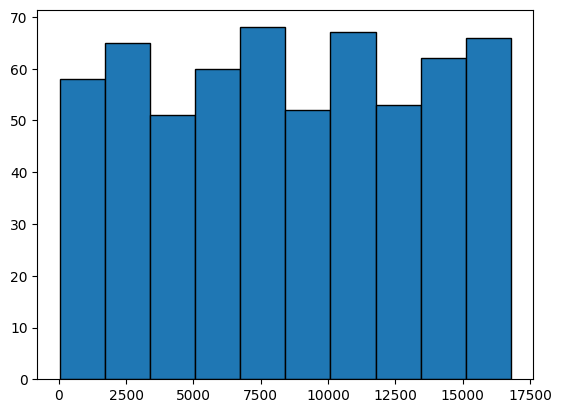

DistrictId :


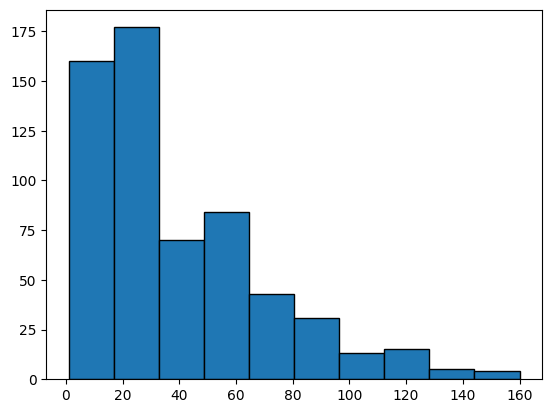

Rooms :


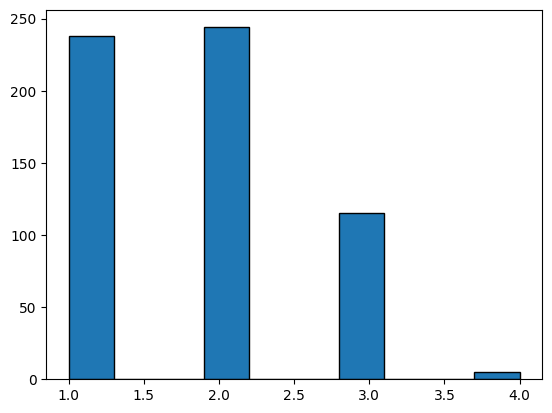

Square :


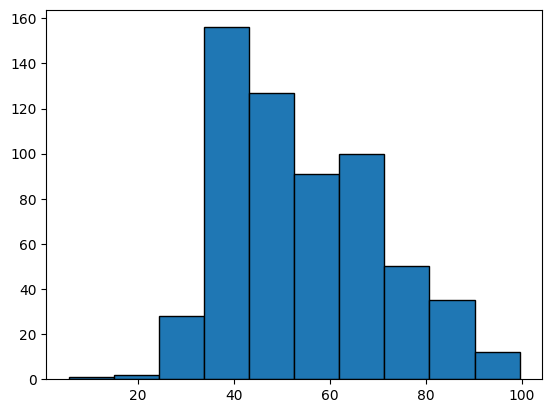

LifeSquare :


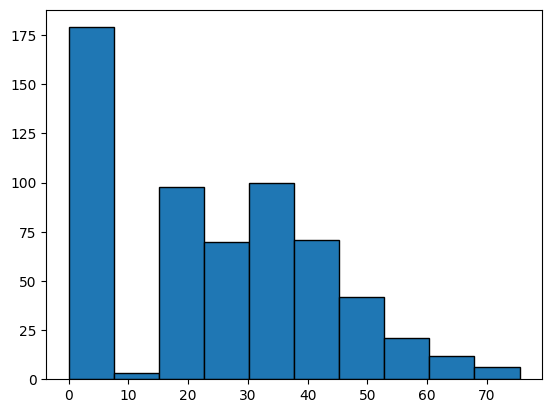

KitchenSquare :


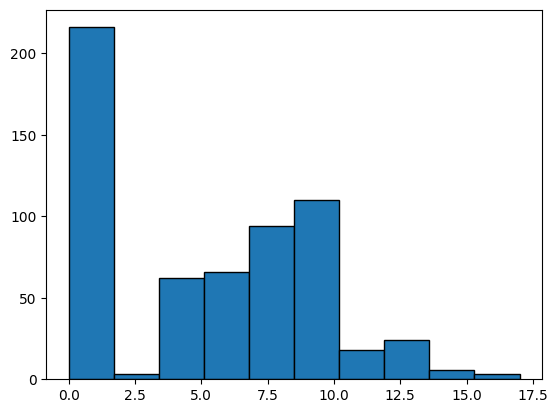

Floor :


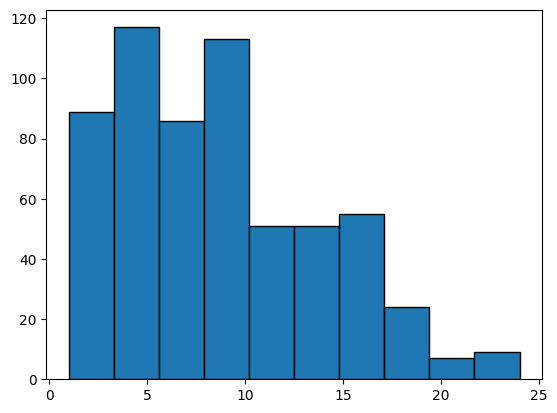

HouseFloor :


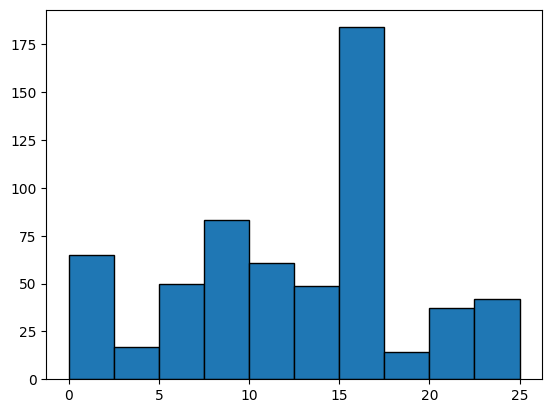

HouseYear :


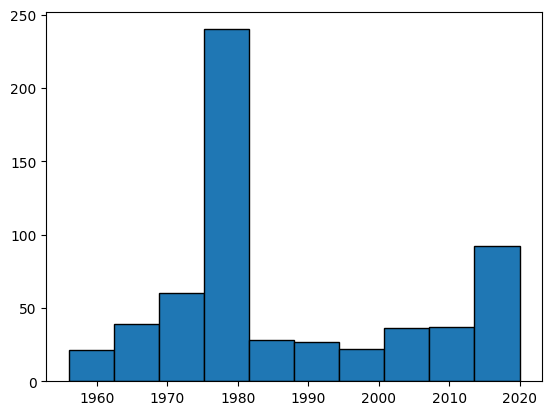

Ecology_1 :


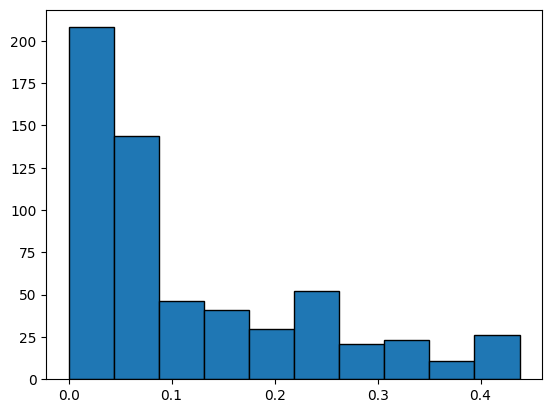

Ecology_2 :


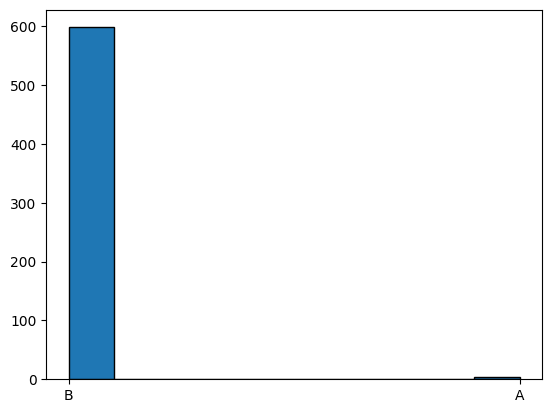

Ecology_3 :


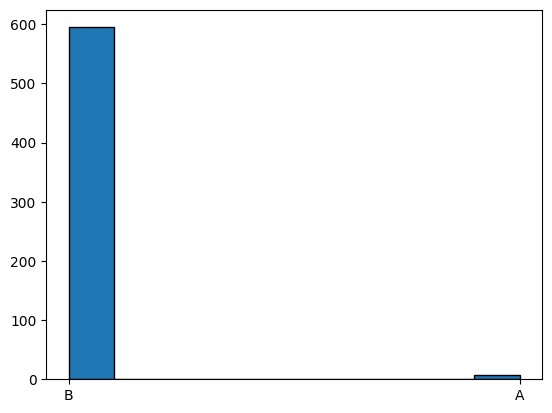

Social_1 :


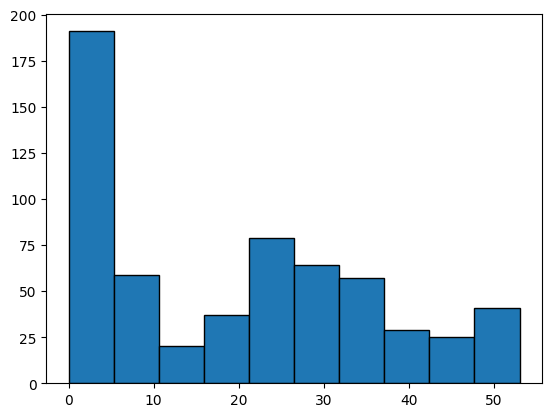

Social_2 :


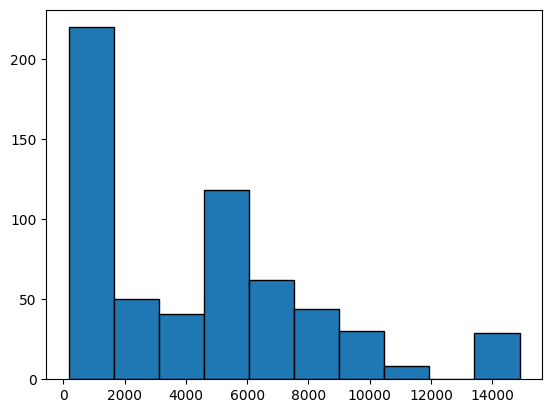

Social_3 :


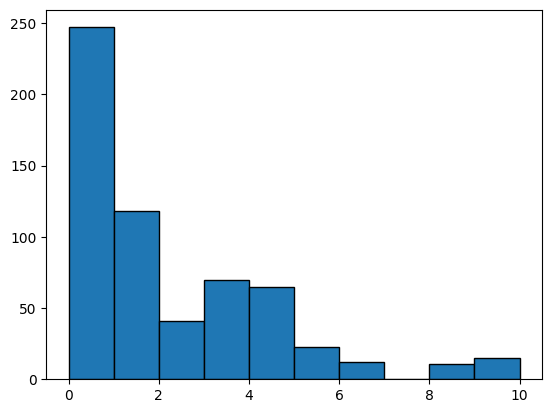

Healthcare_1 :


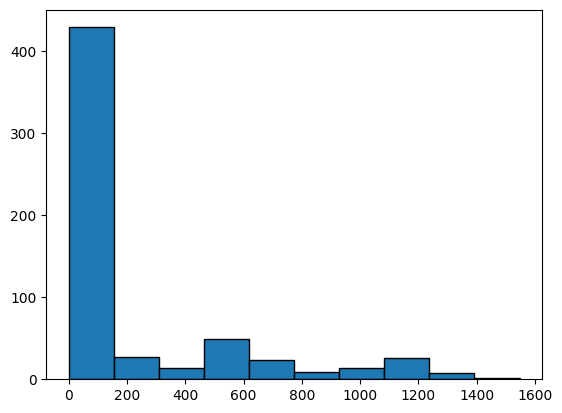

Helthcare_2 :


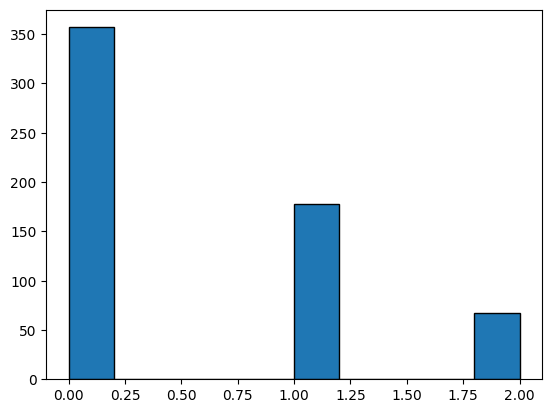

Shops_1 :


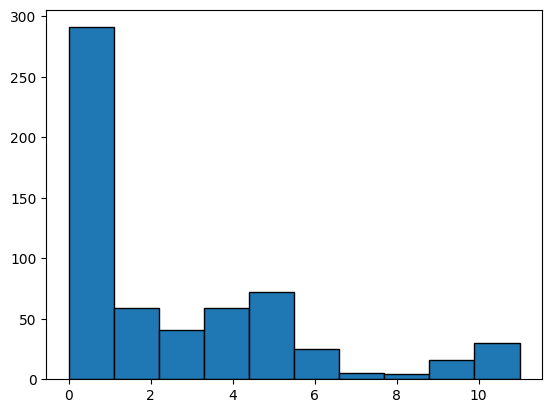

Shops_2 :


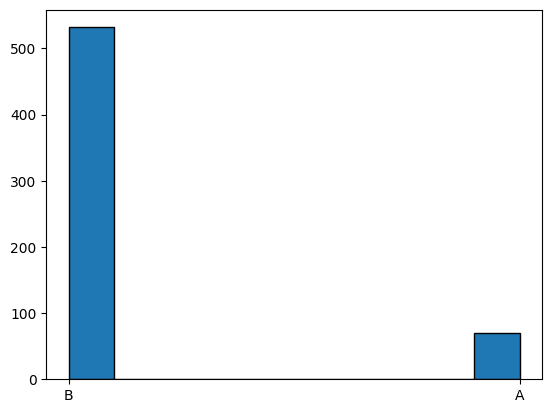

In [8]:
test_csv_file = csv_file.copy()
print("Все пустые строки игнорировались при создании гистограммы")
for colum in test_csv_file.columns:
    print(colum, ":")
    test_csv_file = test_csv_file[test_csv_file[colum] != "unknown"]
    plt.hist(test_csv_file[colum], edgecolor='black')
    plt.show()

Все пустые строки игнорировались при создании гистограммы
Id :


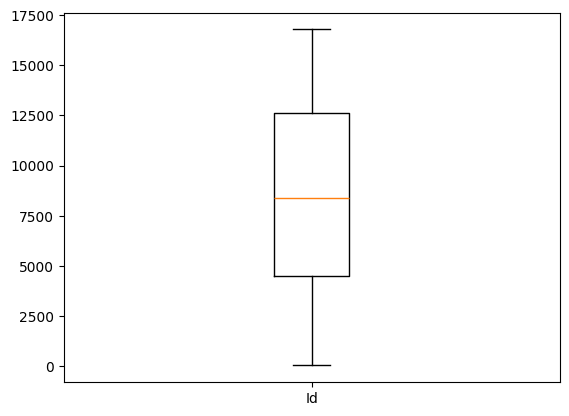

DistrictId :


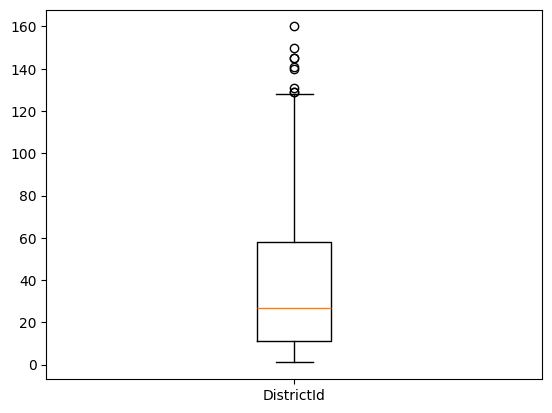

Rooms :


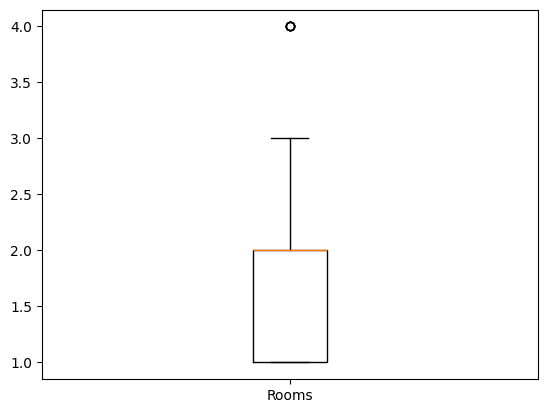

Square :


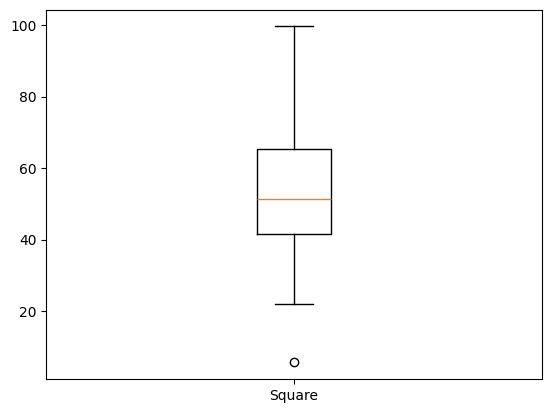

LifeSquare :


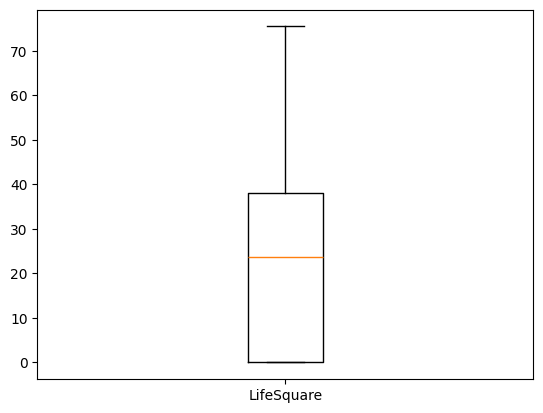

KitchenSquare :


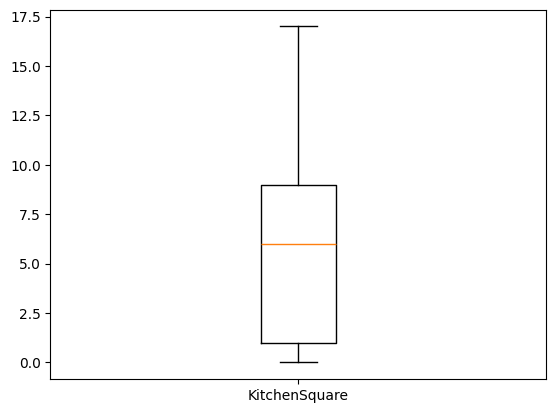

Floor :


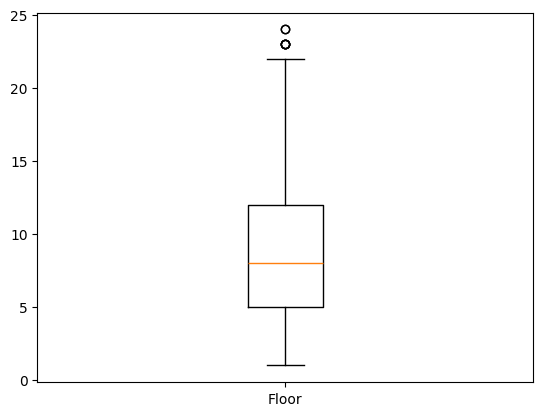

HouseFloor :


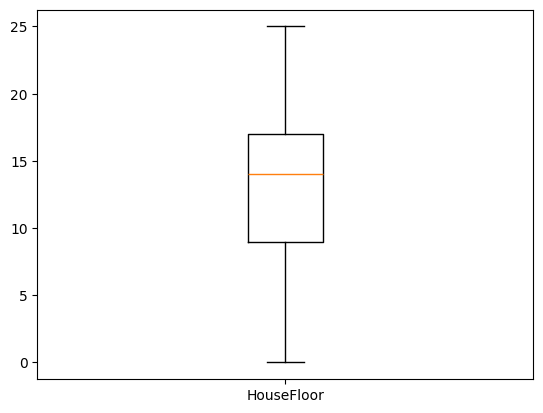

HouseYear :


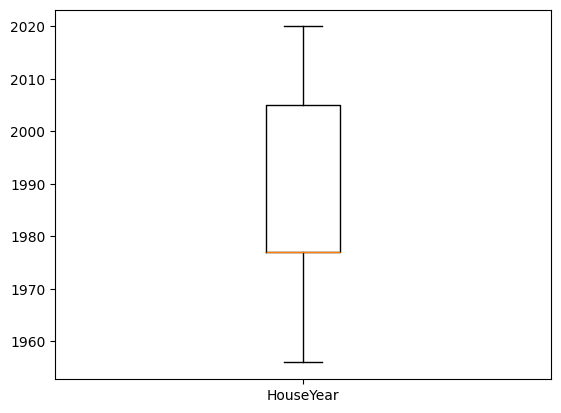

Ecology_1 :


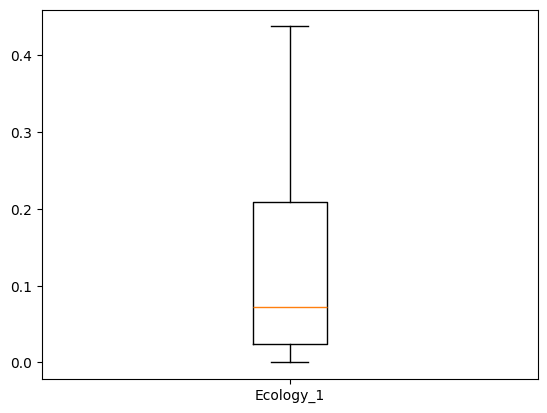

Ecology_2 :
Столбец:  Ecology_2 Имеет не int64 и не float64, а:  object
Ecology_3 :
Столбец:  Ecology_3 Имеет не int64 и не float64, а:  object
Social_1 :


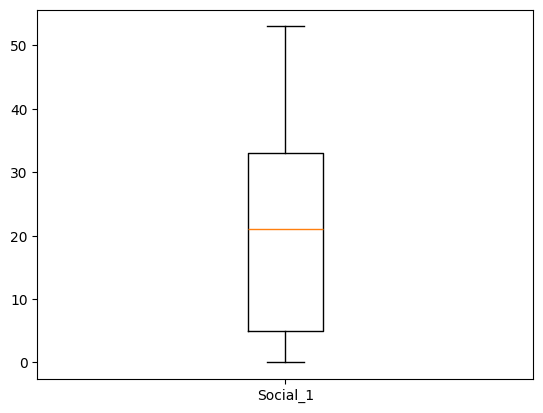

Social_2 :


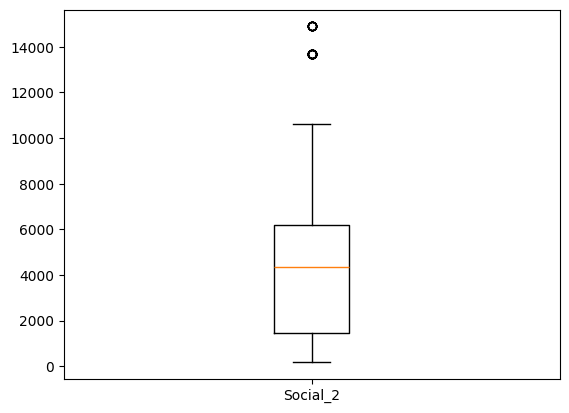

Social_3 :


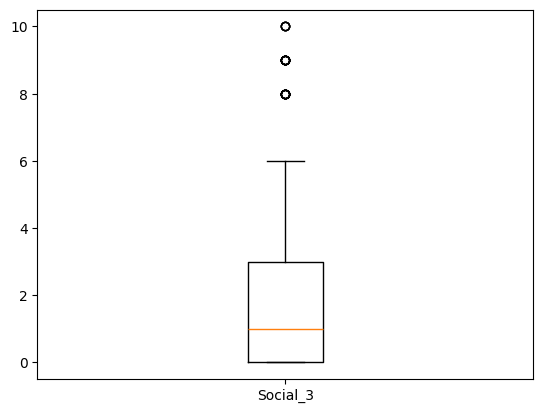

Healthcare_1 :


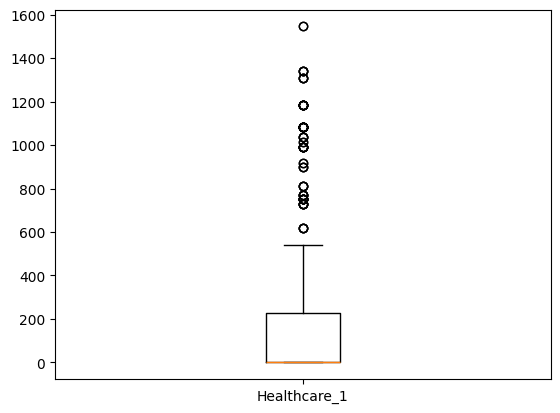

Helthcare_2 :


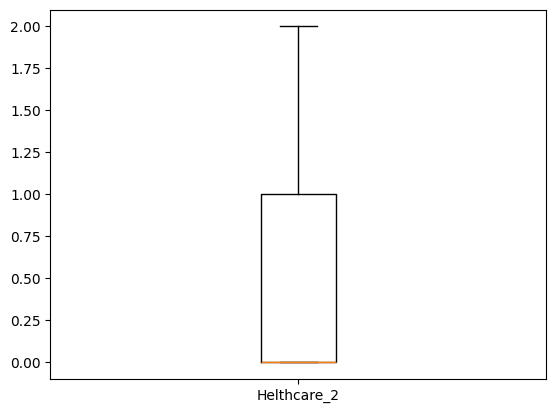

Shops_1 :


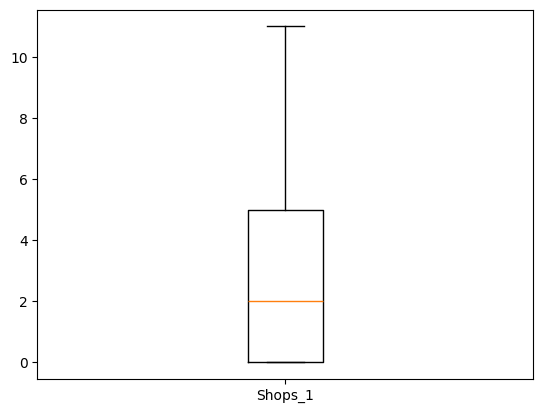

Shops_2 :
Столбец:  Shops_2 Имеет не int64 и не float64, а:  object


In [9]:
new_test_csv_file = csv_file.copy()
print("Все пустые строки игнорировались при создании гистограммы")
for colum in new_test_csv_file.columns:
    print(colum, ":")
    new_test_csv_file = new_test_csv_file[new_test_csv_file[colum] != "0.00"]
    if new_test_csv_file[colum].dtype == "int64" or new_test_csv_file[colum].dtype == "float64": 
        plt.boxplot(test_csv_file[colum].values)
        plt.xticks([1], [colum])
        plt.show()
    else:
        print("Столбец: ", colum, "Имеет не int64 и не float64, а: ", new_test_csv_file[colum].dtype)

In [15]:
flat_info = pd.pivot_table(csv_file, values='Id', index=['DistrictId'], columns=['Rooms'], aggfunc=np.sum, fill_value=0)
print(flat_info)

Rooms          1.0     2.0     3.0  4.0
DistrictId                             
1           185030  178152   72298    0
2            49154   45153       0    0
3            30368   23146       0    0
6           117693  163290  109797    0
7              669       0       0    0
...            ...     ...     ...  ...
140           5770       0       0    0
141              0    3149       0    0
145           7802   12176       0    0
150              0   11155       0    0
160              0   16349       0    0

[75 rows x 4 columns]


C:\Users\ilako\AppData\Local\Temp\ipykernel_9356\1619660658.py:1: FutureWarning: The provided callable <function sum at 0x000002313BCA8AF0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flat_info = pd.pivot_table(csv_file, values='Id', index=['DistrictId'], columns=['Rooms'], aggfunc=np.sum, fill_value=0)


In [13]:
csv_file.to_csv('surname.csv', index=False)